In [11]:
# auto reload packages
%load_ext autoreload
%autoreload 2
# import packages
import numpy as np
import matplotlib.pyplot as plt
# import local packages
import toroidal_physics as tp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
r_major = 1
r_minor = 0.5*r_major

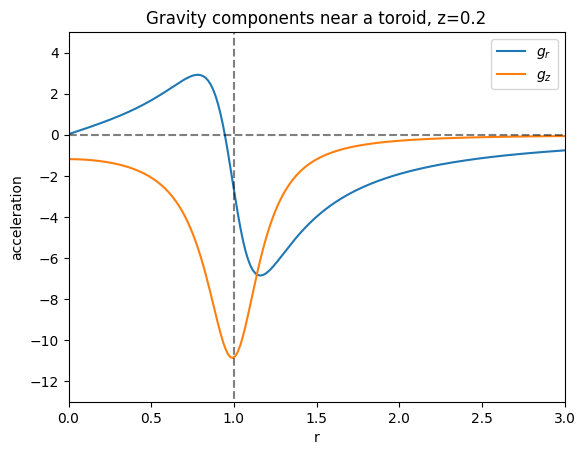

In [13]:
r = np.linspace(0, 3, 200)
z = 0.2
a_r, a_z = tp.toroidal_gravity(r, z, r_major)

plt.plot(r, a_r, label="$g_r$")
plt.plot(r, a_z, label="$g_z$")
# y=0 line
plt.plot(r, np.zeros(len(r)), 'k--', alpha=0.5)

# x=1 line
plt.plot(np.ones(100), np.linspace(-15,15,100), 'k--', alpha=0.5)

plt.xlim(np.min(r), np.max(r))
plt.ylim(-13,5)

# plt.plot(r, a_theta, label="a_theta")
# plt.plot(r, a_simple, label="a_simple")
# plt.ylim(-10,10)
plt.xlabel("r")
plt.ylabel("acceleration")
plt.title("Gravity components near a toroid, z="+str(z))

plt.legend()

In [14]:
aspect_ratio = 0.5 # r_minor / r_major
r_major = 6_378e3/(1+aspect_ratio) # m (radius of the earth)
r_minor = aspect_ratio*r_major
g_0 = 9.81 # m/s^2 (gravitational acceleration at the equator)
omega = 2*np.pi / 24 / 3600 # 1 rotation per day

In [15]:
phi = np.linspace(0, 2 * np.pi, 100)

r, z = tp.toroidal2cylindrical(phi, r_major, r_minor)

g_r, g_z = tp.toroidal_gravity(r, z, r_major)
g_r, g_z = tp.scale_gravity(g_r, g_z, phi, g_0)

centrifugal_r = tp.centrifugal_acceleration(r, omega)

Text(-0.02, 0, 'toroidal axis')

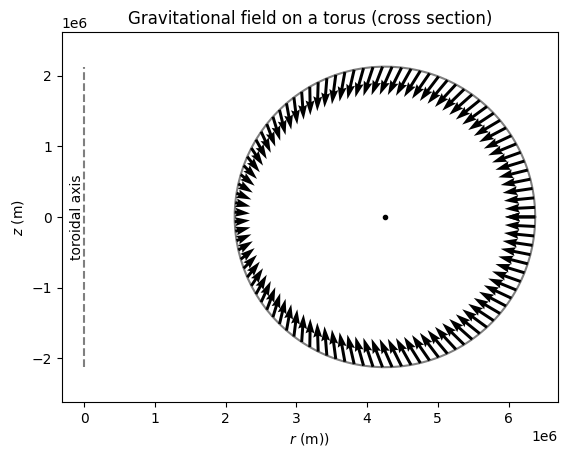

In [25]:
plt.plot(r,z,'k-', alpha=0.5)
plt.plot(r_major,0,'k.')
plt.plot([0,0],[-r_minor,r_minor],'k--', alpha=0.5)
plt.quiver(r,z,g_r,g_z)
# plt.quiver(r,z,centrifugal_r,0)
plt.axis('equal')
plt.xlabel(r'$r$ (m))')
plt.ylabel(r'$z$ (m)')
plt.title('Gravitational field on a torus (cross section)')
plt.text(-0.02,0,'toroidal axis', ha='right', va='center', 
rotation=90)
# plt.xlim((-0.15,1.6))

# add quiver scaling
# plt.quiver(0.2,-0.4,0.1,0)
# plt.text(0.2,-0.42,'0.1 m/s$^2$', ha='left', va='top',
# rotation=0)


Text(0, 0.5, 'centrifugal acceleration (ms$^{-2}$)')

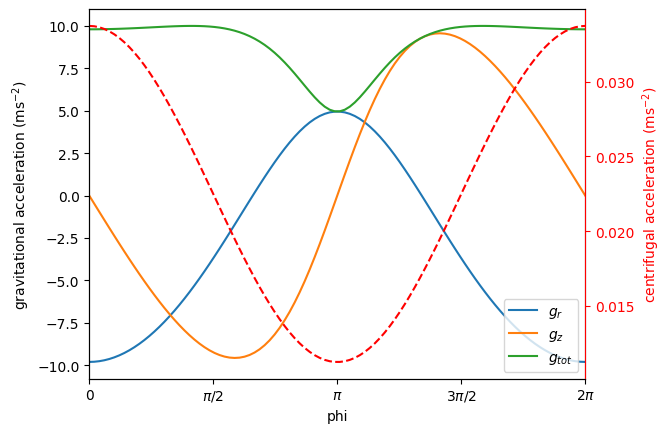

In [38]:
plt.plot(phi, g_r, label="$g_r$")
plt.plot(phi, g_z, label="$g_z$")
plt.plot(phi, np.sqrt(np.square(g_r) + np.square(g_z)), label="$g_{tot}$")
plt.ylabel("gravitational acceleration (ms$^{-2}$)")
# legend in the bottom right
plt.legend(loc="lower right")
plt.xlabel("phi")
# x axis is in radians
plt.xticks(np.linspace(0, 2 * np.pi, 5), ["0", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"])
plt.xlim(0, 2 * np.pi)

# second y axis
plt.twinx()
# make red
plt.gca().spines['right'].set_color('red')
# make red axis label
plt.gca().yaxis.label.set_color('red')
# ticks too
plt.gca().tick_params(axis='y', colors='red')

# centrifugal acceleration on the second y axis
plt.plot(phi, centrifugal_r, label="$a_{c,r}$", color="r", linestyle="--")
plt.ylabel("centrifugal acceleration (ms$^{-2}$)")